In [1]:
#shape Matching
import numpy as np
import cv2
import matplotlib.pyplot as plt

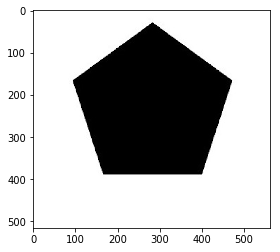

In [2]:
# Load the shape template or reference image
template = cv2.imread('images/5star.jpg',0)
#cv2.namedWindow("output", cv2.WINDOW_NORMAL)
#cv2.imshow('Template', template)
#cv2.waitKey(1)
plt.imshow(template, cmap ="gray")

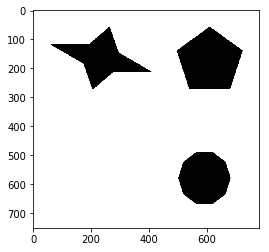

In [3]:
#Load the target image with the shape we are trying to match
target = cv2.imread('images/shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
plt.imshow(target_gray, cmap ="gray")

In [4]:
#threshold both images
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
#plt.imshow(thresh1, cmap ="gray")
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

In [5]:
#find contours in template
contours1, hierarchy = cv2.findContours(thresh1,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
#one for outside whole area and another is inside area
print("Template image Contours:",len(contours1))

Template image Contours: 2


In [8]:
# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours1, key=cv2.contourArea, reverse=True)
#print(sorted_contours)
#so second large contour which will be our template contour
template_contour = contours1[1]

In [9]:
#now extract the contour from second or target image shapes
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print("Target image Contours:",len(contours))

Target image Contours: 4


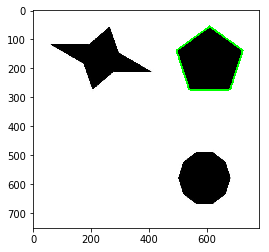

In [10]:
#now matching 
closest_contour = []
for cnt in contours:
    match = cv2.matchShapes(template_contour, cnt, 3, 0.0)
    #print("Match:", match)
    #if the value is less than 0.15 if the value is less accuracy is more
    if match < 0.15:
        closest_contour = cnt
       # print(match)

#print(closest_contour)
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 5)
plt.imshow(target, cmap ="gray")